### Evaluation notebook for trained and saved models

In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=0
import numpy as np
import torch
from torch import nn
from mapsgan import cLRSolver, cVAESolver , BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
from pathlib import Path
import os, glob

env: CUDA_VISIBLE_DEVICES=0


In [2]:
torch.cuda.is_available()

False

### Set these manually according to the script

In [3]:
# can directly copy-paste from the script
mode = 'clr'
fileprefix = '/local/clr_1'
lr_gen = 1e-3
lr_dis = 1e-3

In [4]:
root_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
filesearch = root_path + '/models' + fileprefix + '*10000*' # can change here acc to saved epoch
filelist = glob.glob(filesearch)
filename = filelist[0]

In [5]:
filename

'/home/yy/ADL4CV/mapsgan/models/local/clr_1_20190114-160949_epoch_10000'

### Initializing dataloader, models, solver

In [6]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.train_dir,
                                  shuffle=True)
_ , testloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,
                                  shuffle=True)

In [7]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode=mode)
discriminator = ToyDiscriminator()

In [8]:
if mode == 'clr':
    solver = cLRSolver(generator, discriminator, 
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': lr_gen}, 'discriminator': {'lr': lr_dis}})
elif mode == 'cvae':
    solver = cVAESolver(generator, discriminator, 
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': lr_gen}, 'discriminator': {'lr': lr_dis}})

### Looking at losses

In [15]:
epochs = solver.load_checkpoint(filename)

Restoring from checkpoint


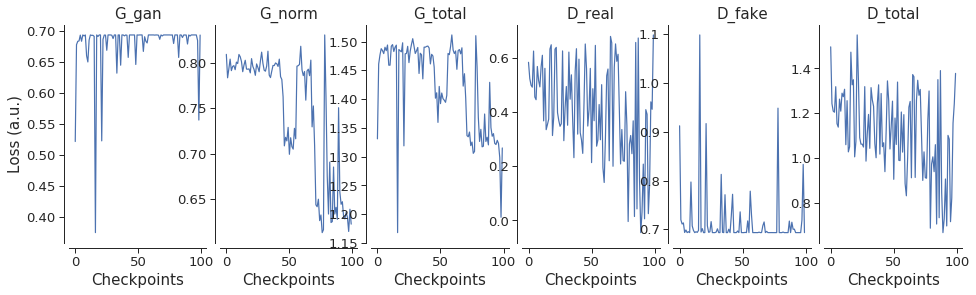

In [17]:
vis = Visualization()
vis.loss(solver.train_loss_history)

### Looking at predictions

In [20]:
output = solver.test(testloader, load_checkpoint_from=filename) #can also use trainloader for overfit

Loading from checkpoint


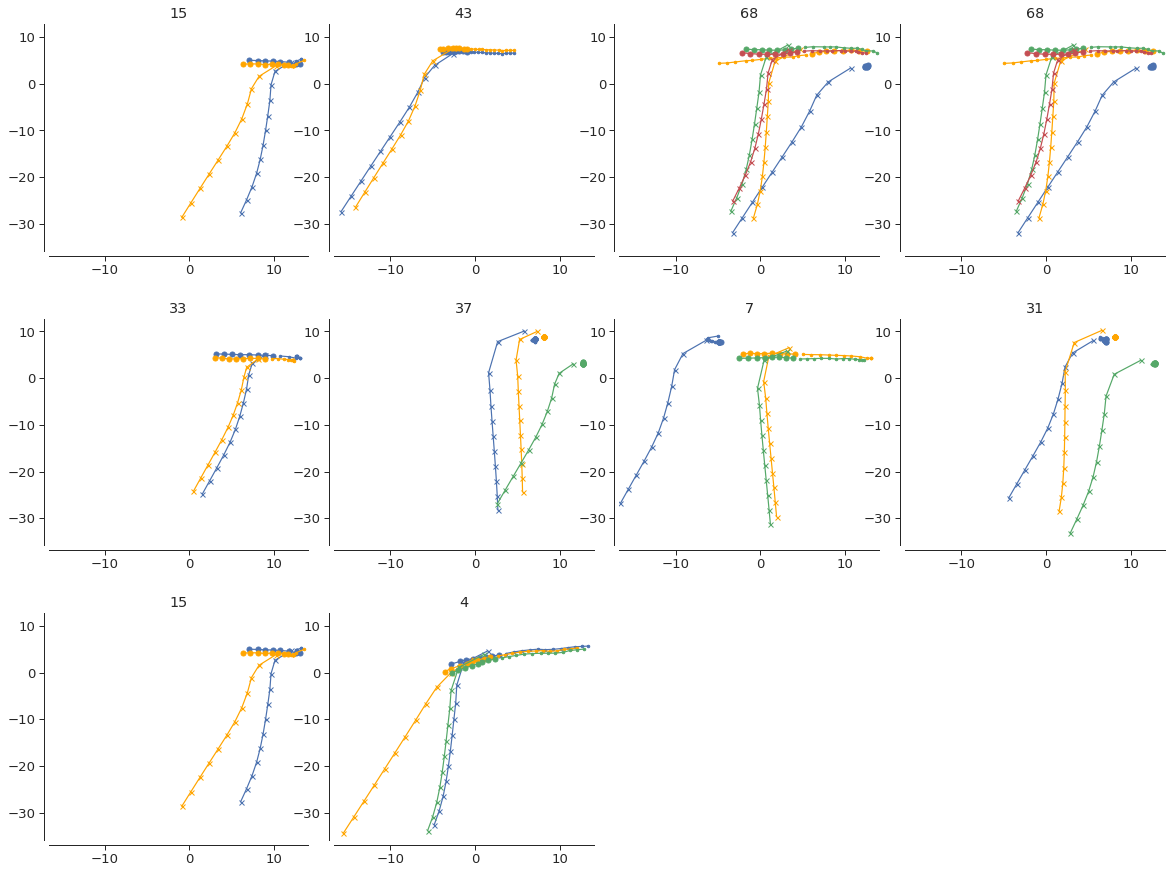

In [19]:
vis = Visualization()
ll = vis.trajectories(output, scenes=[10])